#Red Belt

Use Python’s Yfinance Package to import the last ten
(10) years of daily price data (the Open and the Close
Prices for each day) for at least five (5) stocks of your
choice. BE SURE THE STOCKS YOU CHOOSE HAVE
THIS DATA AVAILABLE FOR ALL OF THE NORMAL
TRADING DAYS IN THE LAST TEN (10) YEARS!

In [1]:
import numpy as np   
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pdr.get_data_yahoo('AMZN','2011-01-03','2021-10-31')
df1 = df1[['Open','Close']] 
df1 = df1.rename(columns ={'Open':'Open_AMZN','Close':'Close_AMZN'})
df2 = pdr.get_data_yahoo('MSFT','2011-01-03','2021-10-31')
df2 = df2[['Open','Close']]
df2 = df2.rename(columns ={'Open':'Open_MSFT','Close':'Close_MSFT'})
df3 = pdr.get_data_yahoo('AAPL','2011-01-03','2021-10-31')
df3 = df3[['Open','Close']] 
df3 = df3.rename(columns ={'Open':'Open_AAPL','Close':'Close_AAPL'})
df4 = pdr.get_data_yahoo('GOOGL','2011-01-03','2021-10-31')
df4 = df4[['Open','Close']] 
df4 = df4.rename(columns ={'Open':'Open_GOOGL','Close':'Close_GOOGL'})
df5 = pdr.get_data_yahoo('FORD','2011-01-03','2021-10-31')
df5 = df5[['Open','Close']] 
df5 = df5.rename(columns ={'Open':'Open_FORD','Close':'Close_FORD'})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Join the individual tables containing the price data for the individual stocks into a single data table indexed by date.

In [3]:
df =df1.merge(df2, on = 'Date')
df =df.merge(df3, on = 'Date')
df =df.merge(df4, on = 'Date')
df =df.merge(df5, on = 'Date')
df


,Open_AMZN,Close_AMZN,Open_MSFT,Close_MSFT,Open_AAPL,Close_AAPL,Open_GOOGL,Close_GOOGL,Open_FORD,Close_FORD
Date,,,,,,,,,,
2011-01-03,181.369995,184.220001,28.049999,27.980000,11.630000,11.770357,298.538544,302.477478,3.13,3.08
2011-01-04,186.149994,185.009995,27.940001,28.090000,11.872857,11.831786,303.113098,301.361359,3.06,3.10
2011-01-05,184.100006,187.419998,27.900000,28.000000,11.769643,11.928571,300.335327,304.839844,3.13,3.32
2011-01-06,186.500000,185.860001,28.040001,28.820000,11.954286,11.918929,305.645660,307.057068,3.20,3.20
2011-01-07,187.880005,185.490005,28.639999,28.600000,11.928214,12.004286,308.263275,308.528534,3.17,3.11
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,3335.000000,3320.370117,309.359985,308.130005,148.679993,148.639999,2751.000000,2748.939941,2.23,2.27
2021-10-26,3349.510010,3376.070068,311.000000,310.109985,149.330002,149.320007,2785.270020,2786.169922,2.30,2.25
2021-10-27,3388.000000,3392.489990,316.000000,323.170013,149.360001,148.850006,2788.100098,2924.350098,2.21,2.17


Slice off the first three (3) years of daily price data.
Retain the Close Prices and convert them into daily return values. Drop any NaN’s as needed. YOU MAY NEED TO CONVERT THIS DATAFRAME INTO A MATRIX AND THEN TRANSPOSE IT IN ORDER TO RUN ALL OF YOUR CODE. BE SURE TO KEEP THE OTHER SEVEN (7) YEARS OF DAILY PRICE DATA AROUND FOR LATER USE!

In [4]:
three_years =  df.loc['2011-01-01':'2013-12-31'] 
three_years = three_years[['Close_AMZN','Close_MSFT','Close_AAPL', 'Close_GOOGL','Close_FORD']]                                     
three_years ['Return_AMZN'] = three_years['Close_AMZN'].pct_change() 
three_years ['Return_MSFT'] = three_years['Close_MSFT'].pct_change() 
three_years ['Return_AAPL'] = three_years['Close_AAPL'].pct_change()
three_years ['Return_GOOGL'] = three_years['Close_GOOGL'].pct_change() 
three_years ['Return_FORD'] = three_years['Close_FORD'].pct_change() 
three_years = three_years[['Return_AMZN','Return_MSFT','Return_AAPL','Return_GOOGL','Return_FORD']]
three_years = three_years.dropna()
three_years



,Return_AMZN,Return_MSFT,Return_AAPL,Return_GOOGL,Return_FORD
Date,,,,,
2011-01-04,0.004288,0.003931,0.005219,-0.003690,0.006494
2011-01-05,0.013026,-0.003204,0.008180,0.011543,0.070968
2011-01-06,-0.008324,0.029286,-0.000808,0.007273,-0.036145
2011-01-07,-0.001991,-0.007634,0.007161,0.004792,-0.028125
2011-01-10,-0.004367,-0.013287,0.018833,-0.003618,0.022508
...,...,...,...,...,...
2013-12-24,-0.009233,0.012562,-0.004245,-0.002923,0.000000
2013-12-26,0.013001,0.009709,-0.006641,0.005055,0.082192
2013-12-27,-0.015604,-0.004006,-0.006757,0.000841,-0.050633


In [5]:
matrix_of_return_values = np.asmatrix(three_years)
matrix_of_return_values = matrix_of_return_values.T

Generate at least ten thousand (10,000) different vectors of weights (percentages), each of whose sum is one (1) and each of whose length is equal to your number of stocks. This is the same as asking you to simulate at least ten thousand (10,000) different portfolio allocations as each of the ten thousand (10,000) different vectors corresponds to a unique portfolio allocation possibility.

In [6]:
no_of_asset_classes = 5
no_of_portfolios = 10000
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

Calculate the overall portfolio mean, the overall portfolio standard deviation, and the Sharpe ratio of each of the portfolio allocation possibilities obtained in the previous step. You may assume a risk-free return rate of zero percent (0%). BE SURE TO CAREFULLY KEEP TRACK OF AND REMEMBER ALL OF THE DIFFERENT VALUES THAT YOU ARE CALCULATING!

In [7]:
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)  
    random_asset_weights = np.asmatrix(random_asset_weights)  
    return random_asset_weights    


def get_portfolio_statistics(asset_weights, matrix_of_return_values): 
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation =np.sqrt(asset_weights * asset_covariances * asset_weights.T) 
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean /portfolio_standard_deviation 
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio


while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    A,B,C=get_portfolio_statistics(random_asset_weights,matrix_of_return_values)
    portfolio_means.append(A)
    portfolio_standard_deviations.append(B)
    portfolio_sharpe_ratios.append(C)


Determine which vector of asset weights (percentages) results in the portfolio allocation possibility of highest Sharpe ratio. Create a Pandas DataFrame with a single row containing these asset weights (percentages) in which the columns are labeled with the asset names and the row has index equal to the last date represented in the dataset you used to perform the portfolio optimization.

In [8]:
#sum of weights is one (1)
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
asset_weights = collection_of_random_asset_weights[index]
asset_weights

matrix([[0.36876792, 0.02673112, 0.29403306, 0.30159773, 0.00887017]])

In [9]:
weights =pd.DataFrame({'AMZN':[asset_weights[0,0]],'MSFT':[asset_weights[0,1]],'AAPL':[asset_weights[0,2]],'GOOGL':[asset_weights[0,3]],'FORD':[asset_weights[0,4]]},index=[three_years.last_valid_index()])
weights

,AMZN,MSFT,AAPL,GOOGL,FORD
2013-12-31,0.368768,0.026731,0.294033,0.301598,0.00887


PLUS DO ANY TWO (2) OF THE FOLLOWING THREE (3)
THINGS:

1. Make a scatterplot showing the corresponding values (x, y) of the overall portfolio standard deviation and overall portfolio mean for each of your portfolio allocation possibilities.

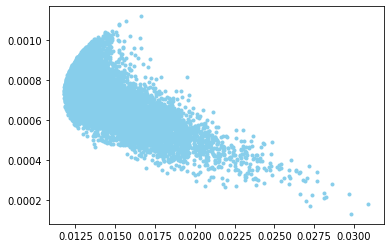

In [10]:
from matplotlib import pyplot as plt
#x1 = np.linspace(0, max(portfolio_standard_deviations), 10000)
#y = portfolio_sharpe_ratios[index] * x1
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'skyblue')
#plt.plot(x1, y, '-', linewidth = 2, color = 'blue')
#plt.plot(portfolio_standard_deviations[index], portfolio_means[index], color= 'r', marker = 'o' )
plt.show()

2. Report the maximum value of Sharpe ratio achieved by any of your portfolio allocation possibilities. (This is the value of the Sharpe ratio corresponding to the vector of asset weights [percentages] you found while completing the task in the fifth bullet point above.)

In [11]:
print(index)
print(portfolio_sharpe_ratios[index])

7932
0.07361794018672088


3. Give a complete conceptual description of the meaning of the Sharpe ratio as it relates to the theory of portfolio optimization. Why do portfolio managers seek to maximize this measure?

Answer:
Sharpe Ratio is used to help investors understand the return of an investment compared to its risk. This ratio in portfolio optimization points the The greater a portfolio's Sharpe ratio, the better its risk-adjusted performance.
The Sharpe ratio can be used either to calculate past performance or expected performance in the future, using expected return and the expected risk-free rate.

portfolio managers seek to maximize this measure, becouse this ratio can help explain whether a portfolio's excess returns are due to smart investment decisions or a result of too much risk. So they can find as much return that they wants with a justified risk.

#Black Belt
part 1: Closed-End Fund

• Using your portfolio weights, combine weights into a single portfolio fund. Using prices open and closes from your Y-finance data “mark-to-market” at the Open and Close. Give your fund a ticker symbol of your choosing.
• To do so we recommend starting with an initial fund size; figuring out the per-stock allocation for each in dollar amounts, and figuring out how many shares of each you would like to buy. We can then use this to calculate the price at the open and close of each day for these shares, which will consider one unit of fund ownership (think 1 ETF share, or one Mutual Fund unit).

In [12]:
capital = 10000
allocations = capital*weights
allocations

,AMZN,MSFT,AAPL,GOOGL,FORD
2013-12-31,3687.679245,267.311191,2940.33064,3015.977272,88.701652


In [13]:
Share_amounts= allocations / df[[f'Open_{sym}'for sym in weights.columns]].loc[weights.last_valid_index()].values
print(Share_amounts)

                AMZN      MSFT        AAPL     GOOGL      FORD
2013-12-31  9.345834  7.147358  148.563177  5.417826  58.35635


In your notebook, display your portfolio-fund as a single instrument for grader to evaluate. It should only have the columns Open and Close; and for an index it should have the all the dates after the portfolio optimization activities from your Red Belt.

In [14]:
#portfolio-fund
seven_years = df.loc['2013-12-31':]
seven_years['Open']= seven_years['Open_AMZN']*Share_amounts['AMZN'].iloc[0]+seven_years['Open_MSFT']*Share_amounts['MSFT'].iloc[0]+ seven_years['Open_AAPL']*Share_amounts['AAPL'].iloc[0]+seven_years['Open_GOOGL']*Share_amounts['GOOGL'].iloc[0]+seven_years['Open_FORD']*Share_amounts['FORD'].iloc[0]
seven_years['Close']= seven_years['Close_AMZN']*Share_amounts['AMZN'].iloc[0]+seven_years['Close_MSFT']*Share_amounts['MSFT'].iloc[0]+seven_years['Close_AAPL']*Share_amounts['AAPL'].iloc[0]+seven_years['Close_GOOGL']*Share_amounts['GOOGL'].iloc[0]+seven_years['Close_FORD']*Share_amounts['FORD'].iloc[0]
seven_years = seven_years[['Open','Close']]
#my fund name
zai_fund = (seven_years.copy())
zai_fund


,Open,Close
Date,,
2013-12-31,10000.000000,10100.480379
2014-01-02,10061.077105,10034.421447
2014-01-03,10046.031930,9928.933510
2014-01-06,9925.397684,9946.156251
2014-01-07,9981.323619,10025.297211
...,...,...
2021-10-25,70502.409552,70342.121663
2021-10-26,70936.060829,71178.398371
2021-10-27,71346.056213,72099.343655


• Print the Absolute Return, Compound Annual Growth Rate, and Information Ratio for your fund.
• Pick an appropriate starting capital and generate an Equity Curve of the portfolio from your Red Belt Exercise. Typical illustrative equity curves begin at 10,000.00 units of currency.

In [15]:
import cufflinks as cf
cf.set_config_file(offline=True)

zai_fund = (seven_years.copy())
absolute_return = ((zai_fund['Close'].iloc[-1]-capital)/capital)*100
CAGR = (((zai_fund['Close'].iloc[-1]/capital)**(252/len(zai_fund)))-1)*100
CAGR1 = (((zai_fund['Close'].iloc[-1]/capital)**(365/(zai_fund.index[-1] - zai_fund.index[0]).days))-1)*100
information_ratio = (zai_fund.Close.pct_change().mean()/zai_fund.Close.pct_change().std())*((252) **0.5)

print(absolute_return)
print(CAGR1)
print(information_ratio)
zai_fund.Close.iplot()


623.1677627224403
28.734955414911333
1.1630424809069344


Black Belt 
Part 2: Building a simplified tradeable forecasting model


• Create labels for predicting next day close as +1.0 for an increase, -1.0 for a decrease.
• Apply the following transforms to generate some mildly predictive features:
o One short moving average
o One longer moving average
o The long minus the short moving averages
o  -The one-day diff on the open.
o Or any others you feel make sense as alternative or additions.

In [16]:
short_time = 5
long_time = 15
zai_fundc = zai_fund.copy()
zai_fundc['Close_short_Rolling']=zai_fundc['Close'].rolling(window=short_time).mean()
zai_fundc['Close_Long_Rolling']=zai_fundc['Close'].rolling(window=long_time).mean()
zai_fundc['Window_diff']=zai_fundc['Close_Long_Rolling']-zai_fundc['Close_short_Rolling']
zai_fundc['Open_1_Change'] = zai_fundc['Open'].shift(1)
zai_fundc = zai_fundc.dropna()
zai_fundc

,Open,Close,Close_short_Rolling,Close_Long_Rolling,Window_diff,Open_1_Change
Date,,,,,,
2014-01-22,10266.664901,10231.425204,10168.002473,10061.406896,-106.595578,10151.817116
2014-01-23,10178.708950,10196.644617,10179.102070,10067.817845,-111.284226,10266.664901
2014-01-24,10157.300411,9940.591590,10139.165066,10061.562521,-77.602545,10178.708950
2014-01-27,9992.583930,9877.899006,10097.793517,10058.160221,-39.633296,10157.300411
2014-01-28,9688.108266,9782.553298,10005.822743,10047.253357,41.430614,9992.583930
...,...,...,...,...,...,...
2021-10-25,70502.409552,70342.121663,71362.438316,70059.671097,-1302.767219,71636.421748
2021-10-26,70936.060829,71178.398371,71169.843635,70271.586566,-898.257069,70502.409552
2021-10-27,71346.056213,72099.343655,71234.174657,70497.553748,-736.620909,70936.060829


• Train-test-split your data using 30% of the data for the train, the remainder for the test.

In [17]:
X = zai_fundc.copy()
y = np.where(X.Close.shift(-1)>=X.Close,1,-1)
index = int(0.30*len(X))
X_train = X.iloc[:index]
X_test= X.iloc[index:]
y_train = y[:index]
y_test= y[index:]

• Create an SK-Learn Logistic Regression and train it with the train data and labels (X and y).

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [19]:
logistic =LogisticRegression()
logistic = logistic.fit(X_train,y_train)
predictions = logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(logistic.score(X_test,y_test))

[[ 53 532]
 [ 63 724]]
0.5663265306122449


• Display your logistic regression coefficients for the grader to evaluate as the output of a cell. 

In [20]:
pd.DataFrame(zip(zai_fundc.columns, np.transpose(logistic.coef_)))

,0,1
0,Open,[0.00024254388800961537]
1,Close,[-0.0001869787525267584]
2,Close_short_Rolling,[0.00029029066345359226]
3,Close_Long_Rolling,[0.00030035429677436704]
4,Window_diff,[1.006363332070362e-05]
5,Open_1_Change,[-0.0006326154253299957]


Generate your predictions using your X_test data, and run a classification report or confusion matrix. If you have not scored above 55%, modify the above choices as required until you find a solution. If you would like to continue without a >55% accuracy rate, that is not a problem. 

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score


print(f"Accuracy: {round(accuracy_score(y_test, predictions), 2)}") 
print(f"Precision: {round(precision_score(y_test, predictions), 2)}")
print(f"Recall: {round(recall_score(y_test, predictions), 2)}")
print(f"F1_score: {round(f1_score(y_test, predictions), 2)}")
print(classification_report(y_test, predictions))


Accuracy: 0.57
Precision: 0.58
Recall: 0.92
F1_score: 0.71
              precision    recall  f1-score   support

          -1       0.46      0.09      0.15       585
           1       0.58      0.92      0.71       787

    accuracy                           0.57      1372
   macro avg       0.52      0.51      0.43      1372
weighted avg       0.53      0.57      0.47      1372



Create a results DataFrame by copying your X_test DataFrame, use this to gather your results through the next few instructions.

In [22]:
results = X_test.copy()

-Create a close-to-close price difference and place it in a column labeled c2c_price in your results DataFrame. 
-Place your predictions, 
-y_test true labels alongside the above in the results DataFrame.

In [23]:
results['c2c_price']= X_test.Close.shift(-1) - X_test.Close
results['Predictions']= predictions
results['True_Label']= y_test
#results

Think for a moment how you can use your close-toclose price difference to calculate a trade return for trading one unit of your fund at the current close price. Use your predictions and the c2c_price to figure out what that trade would result in, in terms of dollars returned per trade.

In [24]:
results['trade_return'] = results['c2c_price']*results['Predictions']

Generate a cumulative trading profit balance in dollar terms and save it to your Results DataFrame.
• Drop any rows containing NaN or similar.
• Display your Results DataFrame as the output of a cell for grader to evaluate.

In [25]:
results['Cumulative_Return'] = results['trade_return'].cumsum()
results.dropna(inplace=True)
results

,Open,Close,Close_short_Rolling,Close_Long_Rolling,Window_diff,Open_1_Change,c2c_price,Predictions,True_Label,trade_return,Cumulative_Return
Date,,,,,,,,,,,
2016-05-20,14384.635673,14448.475445,14399.892811,14289.357502,-110.535308,14307.080994,-41.733110,1,-1,-41.733110,-41.733110
2016-05-23,14477.236141,14406.742335,14374.487035,14304.741311,-69.745724,14384.635673,223.201181,1,1,223.201181,181.468071
2016-05-24,14467.317961,14629.943516,14438.810164,14341.395097,-97.415067,14477.236141,133.923258,1,1,133.923258,315.391329
2016-05-25,14705.920306,14763.866774,14516.326866,14388.588896,-127.737970,14467.317961,84.417949,1,1,84.417949,399.809279
2016-05-26,14753.173313,14848.284724,14619.462559,14449.881372,-169.581187,14705.920306,33.699614,1,1,33.699614,433.508893
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,71636.421748,70512.897643,71649.240514,69844.895470,-1804.345044,71699.215349,-170.775980,1,-1,-170.775980,58584.259706
2021-10-25,70502.409552,70342.121663,71362.438316,70059.671097,-1302.767219,71636.421748,836.276709,1,1,836.276709,59420.536415
2021-10-26,70936.060829,71178.398371,71169.843635,70271.586566,-898.257069,70502.409552,920.945284,1,1,920.945284,60341.481699


black belt
Part 3: Evaluating our Simplified Algorithmic Trading Model.

- Calculate the absolute return, CAGR and IR for your optimized portfolio. 
- absolute return, CAGR and IR for your candidate algorithmic trading using an appropriate starting value.

In [26]:
#trading strategy
absolute_return_bh = ((results.Cumulative_Return.iloc[-1])/capital)*100
CAGR_bh = (((results.Cumulative_Return.iloc[-1]/capital)**(252/len(results)))-1)*100
#CAGR1_bh = (((results.Cumulative_Return.iloc[-1]/capital)**(365/(results.index[-1] - results.index[0]).days))-1)*100
IR_bh = (results.Cumulative_Return.pct_change().mean()/results.Cumulative_Return.pct_change().std())*((252) **0.5)

print(absolute_return_bh)
print(CAGR_bh)
#print(CAGR1_bh)
print(IR_bh)

results.Cumulative_Return.iplot()

605.5891431564299
39.241967249737385
0.3727071041728252


In [27]:
#Buy And Hold (colse - open)/open
absolute_return_fn = ((results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0])*100
CAGR_fn = (((results.Close.iloc[-1]/results.Open.iloc[0])**(252/len(results)))-1)*100
#CAGR1_fn = (((results.Close.iloc[-1]/results.Open.iloc[0])**(365/(results.index[-1] - results.index[0]).days))-1)*100
IR_fn = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)

print(absolute_return_fn)
print(CAGR_fn)
#print(CAGR1_fn)
print(IR_fn)
results.Close.iplot()

408.4181322114363
34.83687529067592
1.316198846298001
